In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
##https://archive.ics.uci.edu/ml/datasets/glass+identification ##Website
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

In [5]:
headernames = [ 'Id number', 'RI (refractive index)', 'Na (Sodium)' ,'Mg (Magnesium)', 'Al(Aluminum)', 'Si(Silicon)', 'K (Potassium)', 'Ca (Calcium', 'Ba (Barium)', 'Fe (Iron)', 'Type_of_glass']

In [6]:
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,Id number,RI (refractive index),Na (Sodium),Mg (Magnesium),Al(Aluminum),Si(Silicon),K (Potassium),Ca (Calcium,Ba (Barium),Fe (Iron),Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
dataset.tail()

,Id number,RI (refractive index),Na (Sodium),Mg (Magnesium),Al(Aluminum),Si(Silicon),K (Potassium),Ca (Calcium,Ba (Barium),Fe (Iron),Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id number                214 non-null int64
RI (refractive index)    214 non-null float64
Na (Sodium)              214 non-null float64
Mg (Magnesium)           214 non-null float64
Al(Aluminum)             214 non-null float64
Si(Silicon)              214 non-null float64
K (Potassium)            214 non-null float64
Ca (Calcium              214 non-null float64
Ba (Barium)              214 non-null float64
Fe (Iron)                214 non-null float64
Type_of_glass            214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


# KNN Algorithum

In [11]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, 10].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[16  5  0  0  0  0]
 [ 6 11  0  1  1  0]
 [ 2  3  0  0  0  0]
 [ 1  2  0  1  1  0]
 [ 3  1  0  0  0  0]
 [ 1  2  0  0  0  8]]
Accuracy: 0.5538461538461539


#  Decision Tree

In [28]:
feature_cols =  [ 'Id number', 'RI (refractive index)', 'Na (Sodium)' ,'Mg (Magnesium)', 'Al(Aluminum)', 'Si(Silicon)', 'K (Potassium)', 'Ca (Calcium', 'Ba (Barium)', 'Fe (Iron)']

In [1]:
X = dataset[feature_cols] # Features
y = dataset.Type_of_glass # Target variable

NameError: name 'dataset' is not defined

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [35]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import  confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[20  0  0  0  0  0]
 [ 0 29  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  7]]
Accuracy: 1.0


In [42]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.444\nsamples = 3\nvalue 

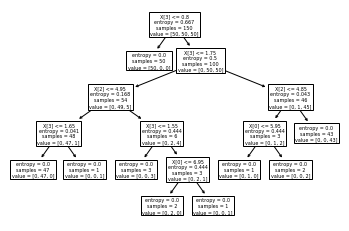

In [43]:
tree.plot_tree(clf) 